In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout,MaxPooling2D


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Preprocessing and Preparation

In [20]:
img_rows, img_cols = 28, 28
num_classes = 10
batch_size = 64
epochs = 30

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [21]:
# preparing the data for Training
train_data = "../input/train.csv"
train = np.loadtxt(train_data, skiprows=1, delimiter=',')
X_train, Y_train = prep_data(train)

# preparing the data for Testing
test_data = "../input/test.csv"
test = np.loadtxt(test_data, skiprows=1, delimiter=',')

## Defining The Model

In [10]:
mnist_model = Sequential() 
mnist_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows,img_cols,1)))
mnist_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2)) )
mnist_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(10, 1, activation='relu'))
mnist_model.add(Conv2D(10, 9))
mnist_model.add(Flatten())
mnist_model.add(Dense(num_classes, activation='softmax'))

## Model Summary

In [11]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 10)        330       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 10)          8110      
__________

## Defining the Loss Function

In [14]:
mnist_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training the Model

In [15]:
visualize = mnist_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,validation_split = 0.2, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 8s 224us/step - loss: 0.3203 - acc: 0.9013 - val_loss: 0.1028 - val_acc: 0.9662
Epoch 2/30
33600/33600 [==============================] - 7s 203us/step - loss: 0.0954 - acc: 0.9706 - val_loss: 0.0847 - val_acc: 0.9730
Epoch 3/30
33600/33600 [==============================] - 7s 202us/step - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0574 - val_acc: 0.9821
Epoch 4/30
33600/33600 [==============================] - 7s 202us/step - loss: 0.0564 - acc: 0.9834 - val_loss: 0.0578 - val_acc: 0.9810
Epoch 5/30
33600/33600 [==============================] - 7s 200us/step - loss: 0.0497 - acc: 0.9847 - val_loss: 0.0519 - val_acc: 0.9840
Epoch 6/30
33600/33600 [==============================] - 7s 199us/step - loss: 0.0438 - acc: 0.9863 - val_loss: 0.0449 - val_acc: 0.9854
Epoch 7/30
33600/33600 [==============================] - 7s 199us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0521 - v

## Plot the Loss and Accuracy of Model

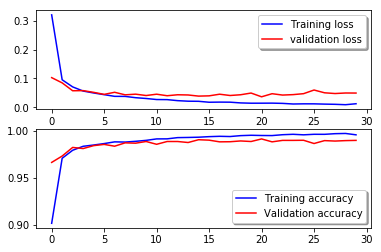

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(visualize.history['loss'], color='b', label="Training loss")
ax[0].plot(visualize.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(visualize.history['acc'], color='b', label="Training accuracy")
ax[1].plot(visualize.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [24]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

## Validation of the Model

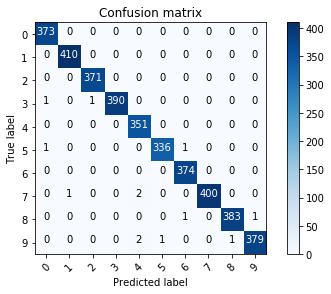

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = mnist_model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))  

## Display Some True and Error Results

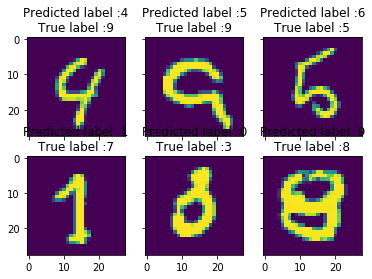

In [26]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Prediction and Submission of Results

In [27]:
# predict results
test = pd.read_csv("../input/test.csv")
test = test / 255.0
test = test.values.reshape(-1,28,28,1)
results = mnist_model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist.csv",index=False)